In [2]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import sklearn

%precision 3

'%.3f'

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

cancer = load_breast_cancer()
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
scores = cross_val_score(tree, cancer.data, cancer.target, cv=5)
print('Cross Validation Scores {}'.format(scores))
print('Cross Validation Scores: {} +- {}'.format(scores.mean(), scores.std()))

Cross Validation Scores [0.904 0.912 0.956 0.939 0.956]
Cross Validation Scores: 0.9332557056357709 +- 0.02183187874377255


In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

cancer= load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

scores = {}
for gamma in np.logspace(-3, 2, num=6):
    for C in np.logspace(-3, 2, num=6):
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        scores[(gamma, C)] = svm.score(X_test, y_test)
        
scores = pd.Series(scores)

print('best: {}'.format(scores.max()))
print('param: gamma, C = {}'.format(scores.idxmax()))

best: 0.9090909090909091
param: gamma, C = (0.001, 1.0)


0.001    0.001      0.629371
         0.010      0.629371
         0.100      0.629371
         1.000      0.909091
         10.000     0.888112
         100.000    0.888112
0.010    0.001      0.629371
         0.010      0.629371
         0.100      0.629371
         1.000      0.629371
         10.000     0.629371
         100.000    0.629371
0.100    0.001      0.629371
         0.010      0.629371
         0.100      0.629371
         1.000      0.629371
         10.000     0.629371
         100.000    0.629371
1.000    0.001      0.629371
         0.010      0.629371
         0.100      0.629371
         1.000      0.629371
         10.000     0.629371
         100.000    0.629371
10.000   0.001      0.629371
         0.010      0.629371
         0.100      0.629371
         1.000      0.629371
         10.000     0.629371
         100.000    0.629371
100.000  0.001      0.629371
         0.010      0.629371
         0.100      0.629371
         1.000      0.629371
         10.00

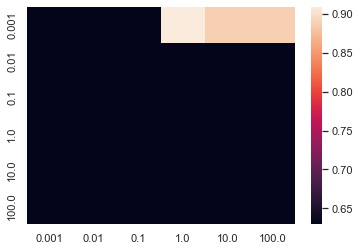

In [8]:
sns.heatmap(scores.unstack())
print(scores)

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)
param_grid = {'C': np.logspace(-3,2, num=6), 'gamma': np.logspace(-3,2,num=6)}
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5)

In [10]:
gs.fit(X_train, y_train)

print('Best CV Score: {:.3f}'.format(gs.best_score_))
print('Best Param: {}'.format(gs.best_params_))
print('Test Score: {:.3f}'.format(gs.score(X_test, y_test)))

Best CV Score: 0.925
Best Param: {'C': 1.0, 'gamma': 0.001}
Test Score: 0.909


In [15]:
from sklearn.svm import SVC

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

model = SVC(gamma=0.001, C=1)
model.fit(X_train, y_train)

print('{} train score: {:.3f}'.format(model.__class__.__name__, model.score(X_train, y_train)))
print('{} test score: {:.3f}'.format(model.__class__.__name__, model.score(X_test, y_test)))

SVC train score: 0.979
SVC test score: 0.909


In [16]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
m = confusion_matrix(y_test, y_pred)
print('Confusion matrix: \n {}'.format(m))

Confusion matrix: 
 [[48  5]
 [ 8 82]]


In [19]:
accuracy = (m[0,0] + m[1,1]) / m.sum()
print('正解率accuracy: {}'.format(accuracy))

accuracy: 0.9090909090909091


In [20]:
precision = (m[1,1])/m[:,1].sum()
# 適合率（杞憂でない割合）
recall = (m[1,1])/m[1,:].sum()
# 再現率（見逃していない割合）
f1 = 2 * (precision * recall) / (precision + recall)
# F1 score
print('適合率（杞憂でない割合）: {:.3f}'.format(precision))
print('再現率(見逃していない割合): {:.3f}'.format(recall))
print('F1 Score: {:.3f}'.format(f1))

適合率（杞憂でない割合）: 0.943
再現率(見逃していない割合): 0.911
F1 Score: 0.927


In [21]:
from sklearn.linear_model import LogisticRegression
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)
results = pd.DataFrame(model.predict_proba(X_test), columns=cancer.target_names)
results.head()

/Users/toritakashi/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,malignant,benign
0,0.004757,0.995243
1,0.000513,0.999487
2,0.044946,0.955054
3,0.007642,0.992358
4,0.003429,0.996571


In [23]:
for threshold in [0.4,0.3,0.15,0.05]:
    results[f'flag_{threshold}'] = results['benign'].map(lambda x: 1 if x > threshold else 0)

results.head(10)

,malignant,benign,flag_0.4,flag_0.3,flag_0.15,flag_0.05
0,0.004757,0.995243,1,1,1,1
1,0.000513,0.999487,1,1,1,1
2,0.044946,0.955054,1,1,1,1
3,0.007642,0.992358,1,1,1,1
4,0.003429,0.996571,1,1,1,1
5,0.006993,0.993007,1,1,1,1
6,0.008989,0.991011,1,1,1,1
7,0.003307,0.996693,1,1,1,1
8,0.857933,0.142067,0,0,0,1
9,0.837684,0.162316,0,0,1,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='false positive rate', ylabel='true positive rate'>

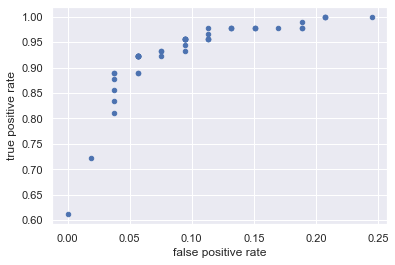

In [25]:
rates = {}
for threshold in np.linspace(0.01, 0.99, num=50):
    labels = results['benign'].map(lambda x: 1 if x > threshold else 0)
    m = confusion_matrix(y_test, labels)
    rates[threshold] = {'false positive rate': m[0,1]/m[0,:].sum(),
                                        'true positive rate': m[1,1]/m[1,:].sum()}

pd.DataFrame(rates).T.plot.scatter('false positive rate', 'true positive rate')

In [26]:
from sklearn import svm
from sklearn.metrics import roc_curve, auc

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.5, random_state=0)
model = svm.SVC(kernel='linear', probability=True, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)[:, 1]

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = auc(fpr,tpr)

TypeError: 'numpy.float64' object is not callable

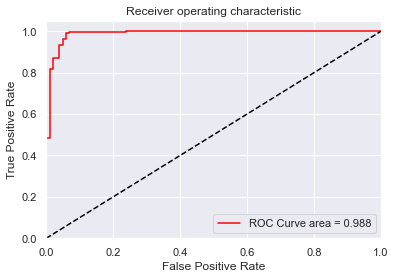

In [38]:
plt.plot(fpr, tpr, color='red', label='ROC Curve area = %.3f' % auc)
plt.plot([0,1],[0,1], color='black', linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='best')

In [51]:
from sklearn.datasets import load_boston

boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target, name='MEDV')
X.join(y).head()

/Users/toritakashi/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(random_state=0),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=0),
    'LinearSVR': LinearSVR(random_state=0)
}

In [56]:
scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'MSE')] = mean_squared_error(y_test, model.predict(X_test))
    scores[(model_name, 'MAE')] = mean_absolute_error(y_test, model.predict(X_test))
    scores[(model_name, 'MedAE')] = median_absolute_error(y_test, model.predict(X_test))
    scores[(model_name, 'R2')] = r2_score(y_test, model.predict(X_test))
    
pd.Series(scores).unstack()

,MAE,MSE,MedAE,R2
DecisionTreeRegressor,3.064822,24.590435,1.900000,0.675653
Linear Regression,3.627793,25.301662,2.903830,0.666272
LinearSVR,3.275385,26.799616,2.092362,0.646514
Ridge,3.618201,25.282890,2.930524,0.666520


In [57]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [58]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
models = {
    'kNN': KNeighborsClassifier(),
    'bagging': BaggingClassifier(KNeighborsClassifier(), n_estimators=100, random_state=0)
}

scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, y_test)
    
pd.Series(scores).unstack()

,test_score,train_score
bagging,0.937063,0.950704
kNN,0.923077,0.948357


In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=66)
models = {
    'tree': DecisionTreeRegressor(random_state=0),
    'AdaBoost': AdaBoostRegressor(DecisionTreeRegressor(), random_state=0)
}

scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, y_test)
    
pd.Series(scores).unstack()

/Users/toritakashi/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

,test_score,train_score
AdaBoost,0.922829,0.999522
tree,0.721430,1.000000


In [62]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=66)
models = {
    'RandomForest': RandomForestRegressor(random_state=0),
    'GradientBoost': GradientBoostingRegressor(random_state=0)
}

scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, y_test)
    
pd.Series(scores).unstack()

/Users/toritakashi/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

,test_score,train_score
GradientBoost,0.926076,0.977138
RandomForest,0.894637,0.979374


<AxesSubplot:>

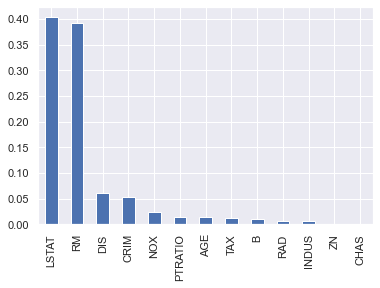

In [63]:
s = pd.Series(models['RandomForest'].feature_importances_, index=boston.feature_names)

s.sort_values(ascending=False).plot.bar(color='C0')